In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji
import gensim

from cleantext import clean
import plotly.express as px

In [2]:
#stop word 다운로드
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words=nltk.corpus.stopwords.words('english')
stop_words.extend(["can't", 'nt', 'app','I'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simoyland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('hellotalk.csv')

In [4]:
df.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,reviewCreatedVersion,at
0,0,Otis Tye,I feel like this program is an old friend.,4,0,NaN,2023-11-06 08:17:27
1,1,Dami Vicky,"very interesting and good app , find a Good fr...",5,0,5.4.41,2023-11-06 06:23:46
2,2,Micky Bélanger,"It used to be very nice and useful, but now th...",1,0,5.4.41,2023-11-06 05:32:07
3,3,Sophia Ahmad,My personal opinion has changed 😍,5,0,5.4.41,2023-11-06 00:36:19
4,4,Yousef El d7i7,Amazing app that will give many chances to to ...,5,0,5.4.41,2023-11-05 22:33:52


In [5]:
df.shape

(29419, 7)

In [6]:
df = df[df['score'] != 3]

In [7]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

In [8]:
def remove_tags(text):
    text = re.sub(r'(@\S+) | (#\S+)', r'', text)
    return text


In [9]:
def remove_stopwords(text):   
    # removing the stop words
    text_data_without_stopwords = " ".join([word for word in text.split() if word.lower() not in stop_words])
    return text_data_without_stopwords

In [10]:
df['content'] = df['content'].astype(str)

In [11]:
df['content_cleaned'] = df['content'].apply(remove_stopwords)
df['content_cleaned'] = df['content_cleaned'].apply(remove_emojis)
df['content_cleaned'] = df['content_cleaned'].apply(remove_tags)

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
df['content_cleaned'] = df['content_cleaned'].apply(lambda x: clean(x, 
                                                            fix_unicode=True, 
                                                            to_ascii=True, 
                                                            lower=True, 
                                                            no_urls=True, 
                                                            no_emails=True,
                                                            no_phone_numbers=True, 
                                                            no_numbers=True,
                                                            no_digits=True, 
                                                            no_currency_symbols=True,
                                                            no_punct=True, 
                                                            lang="en"))
df['content_cleaned'] = df['content_cleaned'].str.replace(r'<number>', '', regex=True)

In [14]:
df.head(50)

,Unnamed: 0,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,content_cleaned
0,0,Otis Tye,I feel like this program is an old friend.,4,0,NaN,2023-11-06 08:17:27,feel like program old friend
1,1,Dami Vicky,"very interesting and good app , find a Good friend",5,0,5.4.41,2023-11-06 06:23:46,interesting good find good friend
2,2,Micky Bélanger,"It used to be very nice and useful, but now they hid the ability to find people living in your city behind a paywall, which makes the app conpletely useless. I'm highly disapointed. I deleted the app.",1,0,5.4.41,2023-11-06 05:32:07,used nice useful hid ability find people living city behind paywall makes conpletely useless im highly disapointed deleted app
3,3,Sophia Ahmad,My personal opinion has changed 😍,5,0,5.4.41,2023-11-06 00:36:19,personal opinion changed
4,4,Yousef El d7i7,"Amazing app that will give many chances to to practice your language that u want to learn, aslo Givs you the chance To make new friends, really deserves 5 stars⭐⭐⭐⭐⭐",5,0,5.4.41,2023-11-05 22:33:52,amazing give many chances practice language u want learn aslo givs chance make new friends really deserves stars
5,5,Cherian Peter,This app bans account for no reason i did not download it i gave it a bad review for banning accounts for no reason plz stop that or i will not install it anymore,1,0,NaN,2023-11-05 22:20:30,bans account reason download gave bad review banning accounts reason plz stop install anymore
6,6,Sujan Xettri,Best language learning app,5,0,5.4.41,2023-11-05 21:20:32,best language learning
7,7,Kavemuii Kazombiaze,It's very beneficial. I learn something everything which is amazing...,5,0,5.4.41,2023-11-05 19:19:52,beneficial learn something everything amazing
8,8,Syafi Yoshi,I used to use this app many years ago to learn japanese. Now i downloaded this app to learn vietnamese but it seems i can't change the language. Unless I'm paying for VIP,1,0,5.4.41,2023-11-05 14:14:03,used use many years ago learn japanese downloaded learn vietnamese seems change language unless im paying vip
9,9,عبدالله رجب محمد عامر,Bad privileges and no answers from support team,1,0,5.4.41,2023-11-05 07:39:46,bad privileges answers support team


In [16]:
df = df[df['content_cleaned'] != '']

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
nan_check = df['content_cleaned'].isna().sum()
print(f"Number of NaN values in 'content_cleaned': {nan_check}")


Number of NaN values in 'content_cleaned': 0


## Lemmatization & Tokenization

In [19]:
# Converting contents to list
data = df.content_cleaned.values.tolist()

In [20]:
def sentences_to_words(sentences):
    for sentence in sentences:
        sentence = gensim.utils.simple_preprocess(str(sentence), deacc=True)
        yield(sentence)

In [21]:
import gensim
data_words = list(sentences_to_words(data))
print(data_words[:2])

[['feel', 'like', 'program', 'old', 'friend'], ['interesting', 'good', 'find', 'good', 'friend']]


In [22]:
import spacy
from gensim.utils import simple_preprocess
from collections import defaultdict

def lemmatize_words(texts, stop_words, allowed_postags=['NOUN','VERB','ADJ','ADV']):
    """Lemmatization of the given texts"""

    
    texts = [[word for word in simple_preprocess(str(doc),min_len=3) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")

    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])

    return texts_out

In [23]:
data_lemmatized = lemmatize_words(data_words, stop_words)

In [24]:
def remove_stopwords_again(doc):
    doc_no_stopwords = [word for word in doc if word.lower() not in stop_words]
    return doc_no_stopwords

# data_lemmatized listesine remove_stopwords_from_doc fonksiyonunu uygula
data_lemmatized_no_stopwords = [remove_stopwords_again(doc) for doc in data_lemmatized]



In [25]:
len(data_lemmatized_no_stopwords)

26767

In [26]:
data_lemmatized

[['feel', 'like', 'program', 'old', 'friend'],
 ['interesting', 'good', 'find', 'good', 'friend'],
 ['use',
  'nice',
  'useful',
  'hide',
  'ability',
  'find',
  'people',
  'live',
  'city',
  'behind',
  'paywall',
  'make',
  'conpletely',
  'useless',
  'highly',
  'disapointe',
  'delete'],
 ['personal', 'opinion', 'change'],
 ['amazing',
  'give',
  'many',
  'chance',
  'practice',
  'language',
  'want',
  'learn',
  'aslo',
  'givs',
  'chance',
  'make',
  'new',
  'friend',
  'really',
  'deserve',
  'star'],
 ['ban',
  'account',
  'reason',
  'download',
  'give',
  'bad',
  'review',
  'ban',
  'account',
  'reason',
  'plz',
  'stop',
  'install',
  'anymore'],
 ['good', 'language', 'learning'],
 ['beneficial', 'learn', 'something', 'everything', 'amazing'],
 ['use',
  'use',
  'many',
  'year',
  'ago',
  'learn',
  'japanese',
  'download',
  'learn',
  'vietnamese',
  'seem',
  'change',
  'language',
  'unless',
  'pay',
  'vip'],
 ['bad', 'privilege', 'answer', '

In [27]:
data_lemmatized_no_stopwords

[['feel', 'like', 'program', 'old', 'friend'],
 ['interesting', 'good', 'find', 'good', 'friend'],
 ['use',
  'nice',
  'useful',
  'hide',
  'ability',
  'find',
  'people',
  'live',
  'city',
  'behind',
  'paywall',
  'make',
  'conpletely',
  'useless',
  'highly',
  'disapointe',
  'delete'],
 ['personal', 'opinion', 'change'],
 ['amazing',
  'give',
  'many',
  'chance',
  'practice',
  'language',
  'want',
  'learn',
  'aslo',
  'givs',
  'chance',
  'make',
  'new',
  'friend',
  'really',
  'deserve',
  'star'],
 ['ban',
  'account',
  'reason',
  'download',
  'give',
  'bad',
  'review',
  'ban',
  'account',
  'reason',
  'plz',
  'stop',
  'install',
  'anymore'],
 ['good', 'language', 'learning'],
 ['beneficial', 'learn', 'something', 'everything', 'amazing'],
 ['use',
  'use',
  'many',
  'year',
  'ago',
  'learn',
  'japanese',
  'download',
  'learn',
  'vietnamese',
  'seem',
  'change',
  'language',
  'unless',
  'pay',
  'vip'],
 ['bad', 'privilege', 'answer', '

In [28]:
data_lemmatized = data_lemmatized_no_stopwords

In [29]:
empty_lists_count = sum(1 for lst in data_lemmatized if not lst)
print(f"Number of empty lists: {empty_lists_count}")


Number of empty lists: 118


In [30]:
# Finding empty list indices
empty_list_indices = [index for index, lst in enumerate(data_lemmatized) if not lst]

print(empty_list_indices)

[156, 468, 880, 1182, 1286, 1509, 1645, 1911, 1948, 2187, 2236, 2562, 2732, 2791, 3280, 3502, 3661, 3748, 3790, 3947, 4216, 4288, 4339, 4418, 4618, 4903, 4913, 5386, 5428, 5515, 5598, 5958, 6177, 6247, 6361, 6686, 6793, 6833, 7113, 7304, 7316, 7384, 7397, 7569, 7669, 7857, 8003, 8271, 8373, 8817, 9207, 9382, 9414, 10230, 10255, 10427, 10446, 10558, 10709, 10906, 10955, 10962, 11128, 11317, 11416, 11794, 12440, 12472, 12564, 12584, 12760, 12785, 12801, 13261, 13305, 13783, 14216, 14503, 14570, 14593, 14753, 15438, 15792, 16457, 16692, 16727, 16748, 17102, 17267, 17877, 18352, 18900, 19148, 19540, 20028, 20236, 20401, 20427, 20693, 21158, 21667, 21785, 22237, 22365, 22585, 22727, 22735, 23588, 24616, 24701, 25223, 25225, 25286, 25750, 25910, 26031, 26340, 26609]


In [31]:
len(data_lemmatized)

26767

In [32]:
len(df)

26767

In [33]:
# Delete empty list indices from the data list
data_lemmatized = [item for i, item in enumerate(data_lemmatized) if i not in empty_list_indices]

In [34]:
df.drop(empty_list_indices, inplace=True)

df.reset_index(drop=True, inplace=True)


In [35]:
for index in empty_list_indices:
    print(f"Index: {index}, Item: {data_lemmatized[index]}")



Index: 156, Item: ['like', 'learn', 'make', 'friend', 'like', 'little', 'bit', 'limit']
Index: 468, Item: ['get', 'receive', 'message', 'side', 'user', 'permanently', 'close', 'due', 'violence', 'behaviour', 'violence', 'behaviour', 'due', 'black', 'screen', 'know', 'say', 'show', 'user', 'become', 'less', 'less', 'time', 'cause', 'nonsense']
Index: 880, Item: ['fraud', 'scam', 'hellotalk', 'keep', 'deduct', 'money', 'bank', 'account', 'every', 'month', 'unsubscribed', 'month', 'still', 'deduct', 'money', 'kindly', 'solve', 'issue', 'return', 'money']
Index: 1182, Item: ['hate', 'funk', 'chase', 'money', 'time', 'passs']
Index: 1286, Item: ['application', 'lot', 'glitch', 'sometimes', 'really', 'frustrating', 'constrain', 'feature', 'suddenly', 'ask', 'buy', 'subscription']
Index: 1509, Item: ['download', 'set', 'account', 'couple', 'day', 'later', 'want', 'try', 'find', 'account', 'block', 'accuse', 'lie', 'nationality', 'say', 'send', 'video', 'state', 'nationality', 'sorry', 'jump',

In [36]:
df.loc[empty_list_indices]

,Unnamed: 0,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,content_cleaned
156,176,Shu lan,I like it i can learn in there i can make friends but i don't like it have a little bit limit,5,0,NaN,2023-10-14 00:34:14,like learn make friends like little bit limit
468,511,Hegzoo MIX,I got received a message from your side that my user has been permanently closed due to violence behaviour! What is the violence behaviour? Due to black screen 😀 I dont know what i should say but it shown why this app users became less and less by time. Cause of those non-sense,1,2,5.4.11,2023-08-27 15:26:28,got received message side user permanently closed due violence behaviour violence behaviour due black screen dont know say shown users became less less time cause nonsense
880,959,Google Khan,Fraud scam app Hellotalk keep on deducting money from my bank account every month. I have unsubscribed the app before 3 months but still they are deducting my money Kindly solve the issue and return my money,1,3,5.2.50,2023-07-02 03:34:07,fraud scam hellotalk keep deducting money bank account every month unsubscribed months still deducting money kindly solve issue return money
1182,1304,Passang Wangdue,"I hate that app ..... funking apps,, chasing money,,,, time passs",1,0,5.2.16,2023-05-14 14:18:46,hate funking apps chasing money time passs
1286,1421,Khushi,"This applications have lots of glitch. Sometimes it's really frustrating, when they constrain some features suddenly and ask them to buy subscription.",1,3,5.2.29,2023-04-25 16:41:32,applications lots glitch sometimes really frustrating constrain features suddenly ask buy subscription
...,...,...,...,...,...,...,...,...
25750,28352,A Google user,Non of the messages anyone has sent me are loading been waiting 20 minutes and tried logging out and back in.,1,0,1.8.2,2015-11-25 00:03:02,non messages anyone sent loading waiting minutes tried logging back in
25910,28536,A Google user,The only problem are people that download an app to talk to other people but they don't want to talk. I don't get it. Obviously is not the app's problem.,5,0,1.8.0.4,2015-09-18 13:06:07,problem people download talk people want talk get it obviously apps problem
26031,28686,A Google user,"I really like this app .. But since yesterday i cant send any msgs , when i send anything you tell me "" you are not allowed to send any messages temporarily "" ! But whyyy ?!! You didnt tell my why ?!! PLEASE RESPONSE !!!",2,0,1.7.7,2015-08-12 05:24:45,really like since yesterday cant send msgs send anything tell allowed send messages temporarily whyyy didnt tell please response
26340,29052,A Google user,"The app is good. The only problem is the continues crash. Other than that, I'm pleased with it. I'm hoping it will be fixed, so I can give it a 5 star",4,0,1.6.6,2015-02-11 09:48:43,good problem continues crash that im pleased it im hoping fixed give star


In [37]:
df.to_csv('hello_talk_cleaned_data.csv')
df_2 = pd.DataFrame(data_lemmatized)
df_2.to_csv('hello_talk_tokenized.csv')

In [38]:
df_2 = pd.read_csv('hello_talk_cleaned_data.csv')

In [39]:
df_from_csv = pd.read_csv('hello_talk_tokenized.csv')

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_12480/3331723331.py:1: DtypeWarning: Columns (63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_csv = pd.read_csv('hello_talk_tokenized.csv')


In [40]:
data_lemmatized = [list(row.dropna()) for _, row in df_from_csv.iterrows()]

for i in range(5):
    print(data_lemmatized [i])

[0, 'feel', 'like', 'program', 'old', 'friend']
[1, 'interesting', 'good', 'find', 'good', 'friend']
[2, 'use', 'nice', 'useful', 'hide', 'ability', 'find', 'people', 'live', 'city', 'behind', 'paywall', 'make', 'conpletely', 'useless', 'highly', 'disapointe', 'delete']
[3, 'personal', 'opinion', 'change']
[4, 'amazing', 'give', 'many', 'chance', 'practice', 'language', 'want', 'learn', 'aslo', 'givs', 'chance', 'make', 'new', 'friend', 'really', 'deserve', 'star']


In [41]:
data_lemmatized = [[elem for elem in sublist[1:]] for sublist in data_lemmatized]


In [42]:
print(data_lemmatized[1])

['interesting', 'good', 'find', 'good', 'friend']


In [43]:
print(data_words[2])

['used', 'nice', 'useful', 'hid', 'ability', 'find', 'people', 'living', 'city', 'behind', 'paywall', 'makes', 'conpletely', 'useless', 'im', 'highly', 'disapointed', 'deleted', 'app']


In [44]:
import gensim
content_bigram=gensim.models.Phrases(data_lemmatized)
content_trigram=gensim.models.Phrases(content_bigram[data_lemmatized])

content_bigram_model=gensim.models.phrases.Phraser(content_bigram)
content_trigram_model=gensim.models.phrases.Phraser(content_trigram)

In [45]:
from gensim import corpora
content_bigram_document=[content_bigram_model[nouns] for nouns in data_lemmatized]
content_bigram_document[:10]

[['feel_like', 'program', 'old', 'friend'],
 ['interesting', 'good', 'find', 'good', 'friend'],
 ['use',
  'nice',
  'useful',
  'hide',
  'ability',
  'find',
  'people',
  'live',
  'city',
  'behind_paywall',
  'make',
  'conpletely',
  'useless',
  'highly',
  'disapointe',
  'delete'],
 ['personal', 'opinion', 'change'],
 ['amazing',
  'give',
  'many',
  'chance',
  'practice',
  'language',
  'want',
  'learn',
  'aslo',
  'givs',
  'chance',
  'make',
  'new_friend',
  'really',
  'deserve_star'],
 ['ban',
  'account',
  'reason',
  'download',
  'give',
  'bad',
  'review',
  'ban',
  'account',
  'reason',
  'plz',
  'stop',
  'install',
  'anymore'],
 ['good', 'language', 'learning'],
 ['beneficial', 'learn', 'something', 'everything', 'amazing'],
 ['use',
  'use',
  'many',
  'year_ago',
  'learn',
  'japanese',
  'download',
  'learn',
  'vietnamese',
  'seem',
  'change',
  'language',
  'unless_pay',
  'vip'],
 ['bad', 'privilege', 'answer', 'support_team']]

In [46]:
len(content_bigram_document)

26649

In [47]:
bigram_list=[]
for i in range(len(content_bigram_document)):
    for j in range(len(content_bigram_document[i])):
        if "_" in content_bigram_document[i][j]:
            bigram_list.append(content_bigram_document[i][j])
            
# Bigram List
list(set(bigram_list))

['click_profile',
 'create_another',
 'anything_else',
 'thus_far',
 'beta_version',
 'improve_communication',
 'high_quality',
 'una_excelente',
 'correction_translation',
 'learning_process',
 'social_platform',
 'english_hindi',
 'customer_support',
 'something_wrong',
 'fake_account',
 'call_permission',
 'comment_moment',
 'require_permission',
 'nothing_happen',
 'send_message',
 'plz_help',
 'kurdistan_flag',
 'super_helpful',
 'throughout_world',
 'todo_mundo',
 'limit_number',
 'let_log',
 'recommend_everyone',
 'take_care',
 'run_background',
 'join_group',
 'vice_versa',
 'pay_monthly',
 'hong_kong',
 'late_version',
 'room_improvement',
 'really_enjoy',
 'pay_cur',
 'daily_basis',
 'across_globe',
 'ever_since',
 'change_rating',
 'native_speakers',
 'rating_star',
 'cultural_exchange',
 'buy_premium',
 'within_hour',
 'stay_away',
 'customer_service',
 'next_day',
 'cur_year',
 'date_purpose',
 'give_star',
 'well_ever',
 'play_store',
 'option_available',
 'couple_day',
 

In [48]:
len(content_bigram_document)

26649

In [49]:
from collections import Counter
tokens=[]
for text in content_bigram_document:
    tokens.extend(text)

counted_tokens=Counter(tokens)
top_50=counted_tokens.most_common(50)
top_50

[('language', 6328),
 ('good', 5515),
 ('learn', 5098),
 ('people', 4111),
 ('great', 3721),
 ('use', 2826),
 ('really', 2564),
 ('love', 2229),
 ('like', 2175),
 ('get', 2112),
 ('make', 1986),
 ('help', 1976),
 ('want', 1748),
 ('account', 1597),
 ('nice', 1568),
 ('one', 1567),
 ('new', 1478),
 ('well', 1357),
 ('lot', 1345),
 ('friend', 1309),
 ('message', 1283),
 ('many', 1268),
 ('talk', 1206),
 ('try', 1159),
 ('even', 1111),
 ('amazing', 1092),
 ('time', 1042),
 ('way', 1041),
 ('find', 1039),
 ('say', 971),
 ('also', 967),
 ('helpful', 961),
 ('meet', 945),
 ('thank', 940),
 ('work', 918),
 ('please', 900),
 ('hellotalk', 893),
 ('chat', 886),
 ('problem', 883),
 ('useful', 877),
 ('learning', 873),
 ('know', 841),
 ('bad', 829),
 ('would', 811),
 ('practice', 806),
 ('much', 806),
 ('see', 799),
 ('application', 795),
 ('awesome', 764),
 ('user', 756)]

In [50]:
len(data_lemmatized)

26649

In [51]:
dictionary = gensim.corpora.Dictionary(content_bigram_document)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 feel_like
1 friend
2 old
3 program
4 find
5 good
6 interesting
7 ability
8 behind_paywall
9 city
10 conpletely


In [52]:
bow_corpus = [dictionary.doc2bow(doc) for doc in content_bigram_document]
bow_corpus[2]

[(4, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1)]

In [53]:
len(dictionary)

15645

In [54]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5665600171530056),
 (1, 0.30096928213084917),
 (2, 0.5130723121301595),
 (3, 0.5702491040787697)]


In [75]:
from gensim.models import CoherenceModel


def compute_performance(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics, 
                                                random_state=12,
                                                iterations=100,
                                                per_word_topics=True)
        model_list.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        perplexity_values.append(lda_model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values

## Coherence Graph

In [1]:
import matplotlib.pyplot as plt
model_list, coherence_values, perplexity_values = compute_performance(corpus_tfidf, dictionary, content_bigram_document, start=2, limit=10, step=1)

#show graph
limit=10; start=2; step=1;
x=range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


NameError: name 'compute_performance' is not defined

In [1]:
print(coherence_values)

NameError: name 'coherence_values' is not defined

In [77]:
# LDA Model
topics_df_tfidf = pd.DataFrame()
lda_model_tfidf =gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                                id2word=dictionary,
                                                num_topics=5, 
                                                random_state=12,
                                                iterations=100,
                                                per_word_topics=True)
for idx, topic in lda_model_tfidf.print_topics(num_words=30):
    topic = topic.split("+")
    topic = [t.strip().replace('"', '').split("*") for t in topic]
    topic_words = [word.strip() for _, word in topic]
    topics_df_tfidf[f"Topic {idx}"] = topic_words

In [78]:
from pprint import pprint
pprint(lda_model_tfidf.print_topics(num_words = 50))

[(0,
  '0.034*"excellent" + 0.029*"cool" + 0.028*"easy_use" + 0.021*"fun" + '
  '0.006*"concept" + 0.005*"awsome" + 0.005*"helping" + 0.005*"interface" + '
  '0.004*"teacher" + 0.004*"great_meeting" + 0.004*"simple" + '
  '0.003*"waste_time" + 0.003*"excelente" + 0.003*"laggy" + 0.003*"muy_buena" '
  '+ 0.003*"absolutely_love" + 0.003*"server" + 0.003*"else" + '
  '0.003*"super_helpful" + 0.002*"haha" + 0.002*"major" + 0.002*"local" + '
  '0.002*"excelent" + 0.002*"awhile" + 0.002*"bar" + 0.002*"character" + '
  '0.002*"problem_solve" + 0.002*"useless" + 0.002*"need_improvement" + '
  '0.002*"generally" + 0.002*"johayo" + 0.002*"card" + 0.002*"saya" + '
  '0.002*"sugoi" + 0.002*"line" + 0.002*"overseas" + 0.002*"awesone" + '
  '0.002*"attempt" + 0.002*"brilliant_idea" + 0.002*"recommend_everyone" + '
  '0.002*"converse" + 0.002*"unique" + 0.002*"hao" + 0.002*"complete" + '
  '0.002*"none" + 0.002*"year_old" + 0.002*"prilozhenie" + 0.002*"exceptional" '
  '+ 0.001*"mode" + 0.001*"fabulo

In [79]:
topics_df_ = pd.DataFrame()

for idx, topic in lda_model_tfidf.print_topics(num_words = 50):

    topic = topic.split('+')
    topic = [t.strip().replace('"', '').split('*') for t in topic]
    topic_words = [word.strip() for _, word in topic]
    

    topics_df_[f"Topic {idx + 1}"] = topic_words


topics_df_

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,excellent,good,amazing,nice,awesome
1,cool,great,work,helpful,message
2,easy_use,love,super,like,useful
3,fun,learn,superb,language,use
4,concept,language,brilliant,people,get
5,awsome,really,definitely,learn,update
6,helping,learning,french,really,problem
7,interface,people,lovely,perfect,work
8,teacher,way,fix_bug,easy,log
9,great_meeting,help,edit,tool,even


In [80]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# LDA Visualization
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(lda_display)


In [81]:
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Wordclouds of Topics

In [85]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
cloud = WordCloud(
                background_color='white',
                width=2500,
                height=1800,
                max_words=50,
                colormap= 'plasma',
                prefer_horizontal=1.0)


IndexError: list index out of range

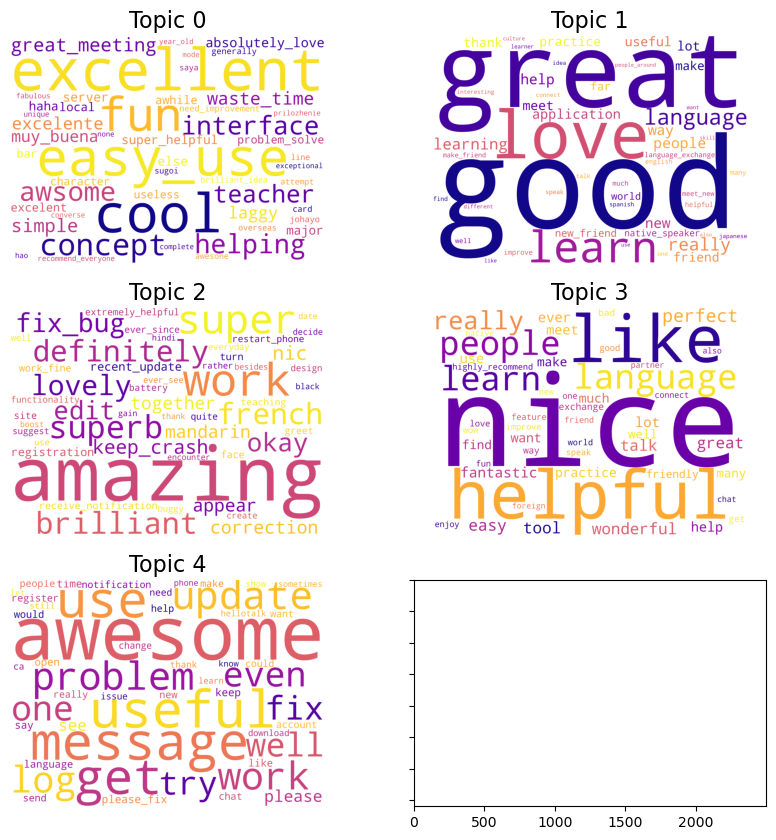

In [86]:
topics = lda_model_tfidf.show_topics(formatted=False, num_words=50)
fig, axes = plt.subplots(3,2, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1000)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()



In [87]:
content_values = list(lda_model_tfidf[corpus_tfidf])
rows = []

for doc_idx, (topic_weights, _, _) in enumerate(content_values):
    # En yüksek ağırlığa sahip olan topic'leri al
    max_weight = max(topic_weights, key=lambda x: x[1])[1]
    dominant_topics = [idx for idx, weight in topic_weights if weight == max_weight]
    
    # Eğer birden fazla topic varsa, ağırlıklar arasında eşitlik kontrolü yap
    if len(dominant_topics) > 1 and max_weight == min(max_weight for idx, max_weight in topic_weights):
        # Birden fazla eşit ağırlığa sahip topic varsa "multiple topics" olarak işaretle
        dominant_topic_index = "multiple topics"
    else:
        # Ağırlığı en yüksek olan topic'i seç
        dominant_topic_index = max(dominant_topics)
    
    # Satırı oluştur ve listeye ekle
    row = {
        **{f"Topic_{idx}": weight for idx, weight in topic_weights},
        "Dominant_Topic": dominant_topic_index
    }
    rows.append(row)


df_topics = pd.DataFrame(rows)

df_topics.index = df_topics.index

df_topics = df_topics[::-1]

df_topics.reset_index(drop=True, inplace=True)



In [88]:
df_topics.head(-10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic
0,0.599931,0.100015,0.100027,0.100014,0.100013,0
1,0.041472,0.041427,0.041052,0.522501,0.353549,3
2,0.264858,0.071996,0.068465,0.070816,0.523864,4
3,0.183309,0.510703,0.054846,0.056561,0.194581,1
4,0.048688,0.052113,0.048934,0.799723,0.050542,3
...,...,...,...,...,...,...
26634,0.051456,0.055533,0.051527,0.052105,0.789379,4
26635,0.044070,0.044115,0.044115,0.044247,0.823452,4
26636,0.155531,0.050831,0.050455,0.051814,0.691369,4
26637,0.100021,0.100028,0.599853,0.100080,0.100018,2


In [89]:
df_2['predicted_topic'] = df_topics['Dominant_Topic']

In [90]:
df_2.to_csv('hellotalk_prediction.csv')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

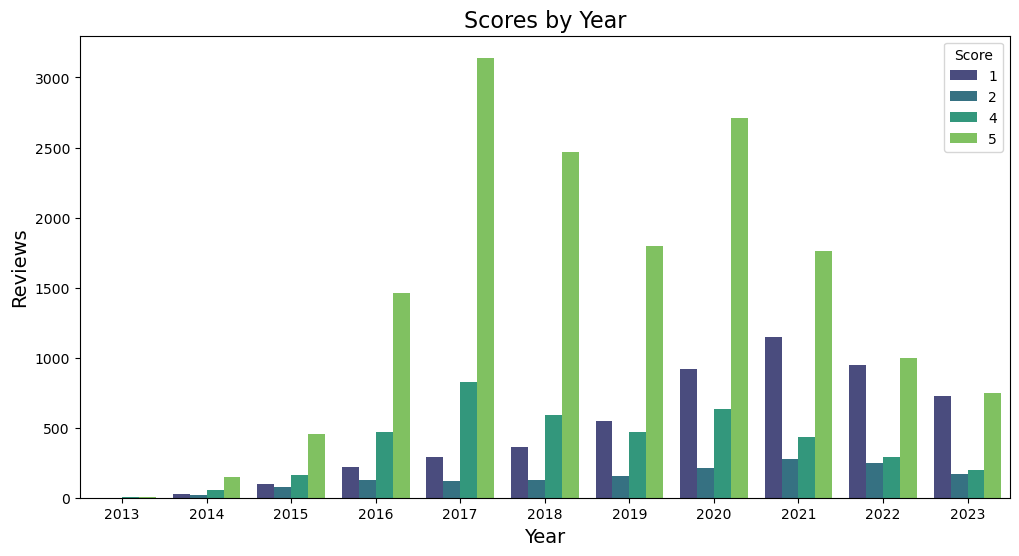

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 'at' sütununu datetime türüne çevirin
df_2['at'] = pd.to_datetime(df_2['at'])

# Yıl bilgisini içeren yeni bir 'year' sütunu ekleyin
df_2['year'] = df_2['at'].dt.year

# Yıllara göre skor dağılımını çıkarın
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='score', data=df_2, palette='viridis')

# Grafiği düzenleme
plt.title('Scores by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Reviews', fontsize=14)
plt.legend(title='Score', loc='upper right')

# Grafiği göster
plt.show()


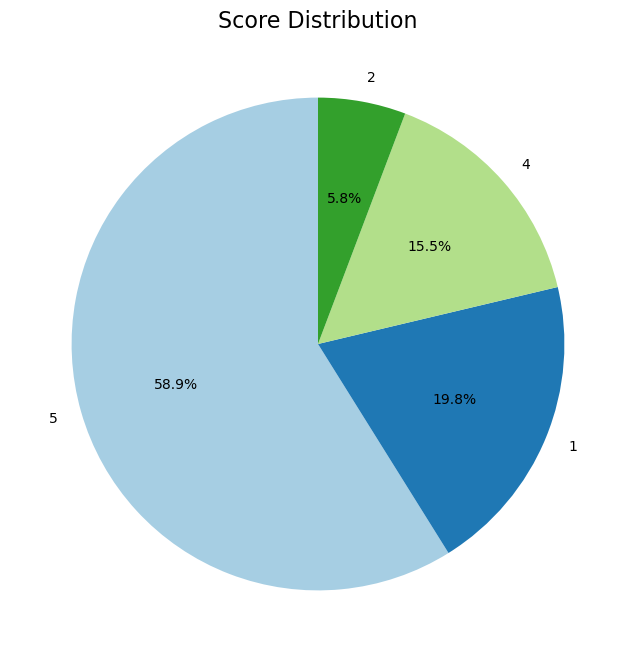

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

score_counts = df_2['score'].value_counts()

# Pasta grafiğini çizin
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Grafiği düzenleme
plt.title('Score Distribution', fontsize=16)

# Grafiği göster
plt.show()


In [94]:
df_topics.to_csv("hellotalk_topic_weights.csv")

In [95]:
def format_topics_sentences(ldamodel=None, corpus = corpus_tfidf , texts = content_bigram_document):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                new_row = pd.DataFrame([int(topic_num), round(prop_topic,4), topic_keywords]).T
                sent_topics_df = pd.concat([new_row, sent_topics_df.loc[:]]).reset_index(drop=True)
            else:
                break
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return(sent_topics_df)

In [96]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus_tfidf, texts=content_bigram_document)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(-10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.5999,"excellent, cool, easy_use, fun, concept, awsome, helping, interface, teacher, great_meeting","[feel_like, program, old, friend]"
1,1,3,0.5227,"nice, helpful, like, language, people, learn, really, perfect, easy, tool","[interesting, good, find, good, friend]"
2,2,4,0.5239,"awesome, message, useful, use, get, update, problem, work, log, even","[use, nice, useful, hide, ability, find, people, live, city, behind_paywall, make, conpletely, useless, highly, disapointe, delete]"
3,3,1,0.5106,"good, great, love, learn, language, really, learning, people, way, help","[personal, opinion, change]"
4,4,3,0.7997,"nice, helpful, like, language, people, learn, really, perfect, easy, tool","[amazing, give, many, chance, practice, language, want, learn, aslo, givs, chance, make, new_friend, really, deserve_star]"
...,...,...,...,...,...
26634,26634,4,0.7894,"awesome, message, useful, use, get, update, problem, work, log, even","[translation, romanize, version, pronunciation, perfect, big, help, already]"
26635,26635,4,0.8235,"awesome, message, useful, use, get, update, problem, work, log, even","[join, within, second, conversation, native_speaker, improve, lot, friend, regularly, talk]"
26636,26636,4,0.6913,"awesome, message, useful, use, get, update, problem, work, log, even","[great, thank]"
26637,26637,2,0.5999,"amazing, work, super, superb, brilliant, definitely, french, lovely, fix_bug, edit","[add, burmese, language, option, fix, pronunciation, bug]"
